# BE de détection d'anomalie pour des mesures de différents paramètres de vol

Premièrement on va visualiser l'allure des données dans un graph même si le nombre de données à l'air trop conséquent pour obtenir un résultat visible.


  day_cycle_window        p1        p2        p3        p4        p5       p6  \
0            1_1_1 -0.805191 -1.141993 -1.328327 -1.516693 -1.373962 -0.80827   
1            1_1_1 -0.805191 -1.134902 -1.320393 -1.505848 -1.361560 -0.80784   
2            1_1_1 -0.805191 -1.117304 -1.307167 -1.505848 -1.361560 -0.80784   
3            1_1_1 -0.814231 -1.114206 -1.287593 -1.442302 -1.287565 -0.80784   
4            1_1_1 -0.848104 -1.112276 -1.285393 -1.429076 -1.270722 -0.80784   

         p7        p8        p9       p10       p11  
0 -1.070547 -0.504352  2.807146  0.495528 -1.246737  
1 -1.064212 -0.516000  2.894177  0.494467 -1.244472  
2 -1.064212 -0.516000  2.981904  0.429370 -1.244472  
3 -1.045557 -0.516000  3.063298  0.348056 -1.244472  
4 -1.017575 -0.664906  3.049237  0.118828 -1.270237  


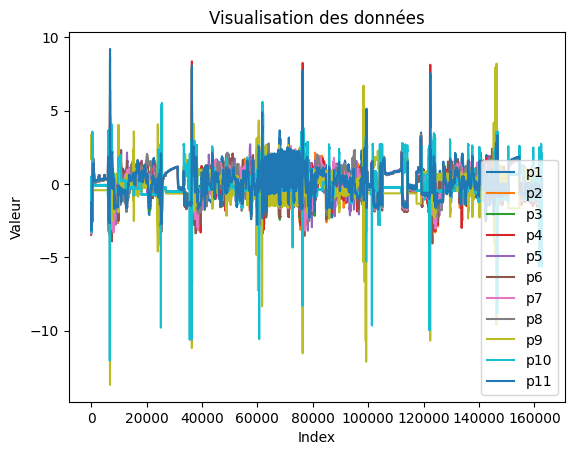

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture de dataset.CSV en ignorant la première ligne (ligne d'explication)
df = pd.read_csv("data/dataset.csv")
print(df.head())
df.plot()
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title("Visualisation des données")
plt.show()

On peut voir que déjà nous observons qu'il y a quelques paramètres qui semblent anormaux en dehors de l'intervalle [-5,5].

Vu le grand nombre de données on va devoir réduire sa taille pour l'interpréter plus facilement. Chaque fenêtre est constituée d'une centaine de mesures et que nous voulons les fenêtres anormales, nous pouvons faire la moyenne des différentes mesures dans une même fenêtre. Nous considèrerons une fenêtre comme anormale lorsqu'elle possède un paramêtre moyen anormalement haut ou bas. Nous classerons comme cela les fenêtres normales et anormales.

Remarque : Nous nous concentrons ici sur l'état moyen de chaque fenêtre, mais nous pourrons aussi visualiser si certaines fenêtres sont anormales par leur variance, ou par deux mesures anormales qui se compensent dans la moyenne par exemple.

  day_cycle_window        p1        p2        p3        p4        p5  \
0            1_1_1 -1.926141 -2.456284 -2.487394 -2.481230 -2.388674   
1            1_1_2 -1.714067 -2.217161 -2.530537 -2.515985 -2.544961   
2            1_1_3 -1.534357 -1.779994 -1.938747 -1.835152 -2.053982   
3            1_1_4 -1.415197 -1.453962 -1.888438 -2.249327 -2.206560   
4            1_1_5 -0.732715 -0.634379 -0.963247 -1.871178 -2.048933   

         p6        p7        p8        p9       p10       p11  
0 -1.984092 -2.447148 -1.169837  2.848242 -1.370045 -2.500060  
1 -1.040076 -2.127244 -0.700150  2.246956 -1.545889 -2.654753  
2 -0.866705 -1.859002 -0.837695  1.903785 -2.853705 -1.926807  
3 -0.732366 -2.144090 -0.687389  1.915830 -0.828060 -2.117340  
4 -0.004074 -1.263891 -0.316854  1.779600 -0.932193 -1.796746  


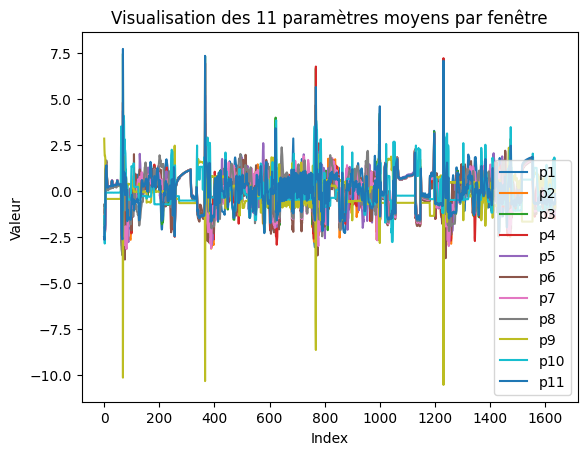

'\n# Sélection des lignes de \na = 0\nb = a+10000\ndf_subset = df.loc[a:b, [\'p1\', \'p2\', \'p3\', \'p4\', \'p5\', \'p6\', \'p7\', \'p8\', \'p9\', \'p10\', \'p11\']]\ndf_subset.plot\nplt.xlabel(\'Index\')\nplt.ylabel(\'Valeur\')\nplt.title("Visualisation des 11 paramètres (lignes {} à {})".format(a, b))\nplt.show()\n'

In [4]:
# Regroupement par la première colonne et calcul de la moyenne pour chaque groupe
df_moyennes = df.groupby('day_cycle_window', sort=False).mean().reset_index()

# # Trier les résultats pour maintenir l'ordre personnalisé de 'day_cycle_window'
# grouped = df_moyennes.sort_values(by='day_cycle_window', key=lambda col: col.str.split('_').map(lambda x: list(map(int, x))))

# Affichage des premières lignes du tableau des moyennes
print(df_moyennes.head())
df_moyennes.plot()
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title("Visualisation des 11 paramètres moyens par fenêtre")
plt.show()

"""
# Sélection des lignes de 
a = 0
b = a+10000
df_subset = df.loc[a:b, ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']]
df_subset.plot
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title("Visualisation des 11 paramètres (lignes {} à {})".format(a, b))
plt.show()
"""

Nous observons deja qu'il y a une dizaine de fenêtres anormales évidentes dans ces données soit environ 1% des données.

Nous voyons ici que certains paramêtres sont plus sujets à des variations que d'autres (par exemple le p4, p9 et p11), tentons de tracer 11 graphiques représentant chacun un paramètre pour y voir plus clair.

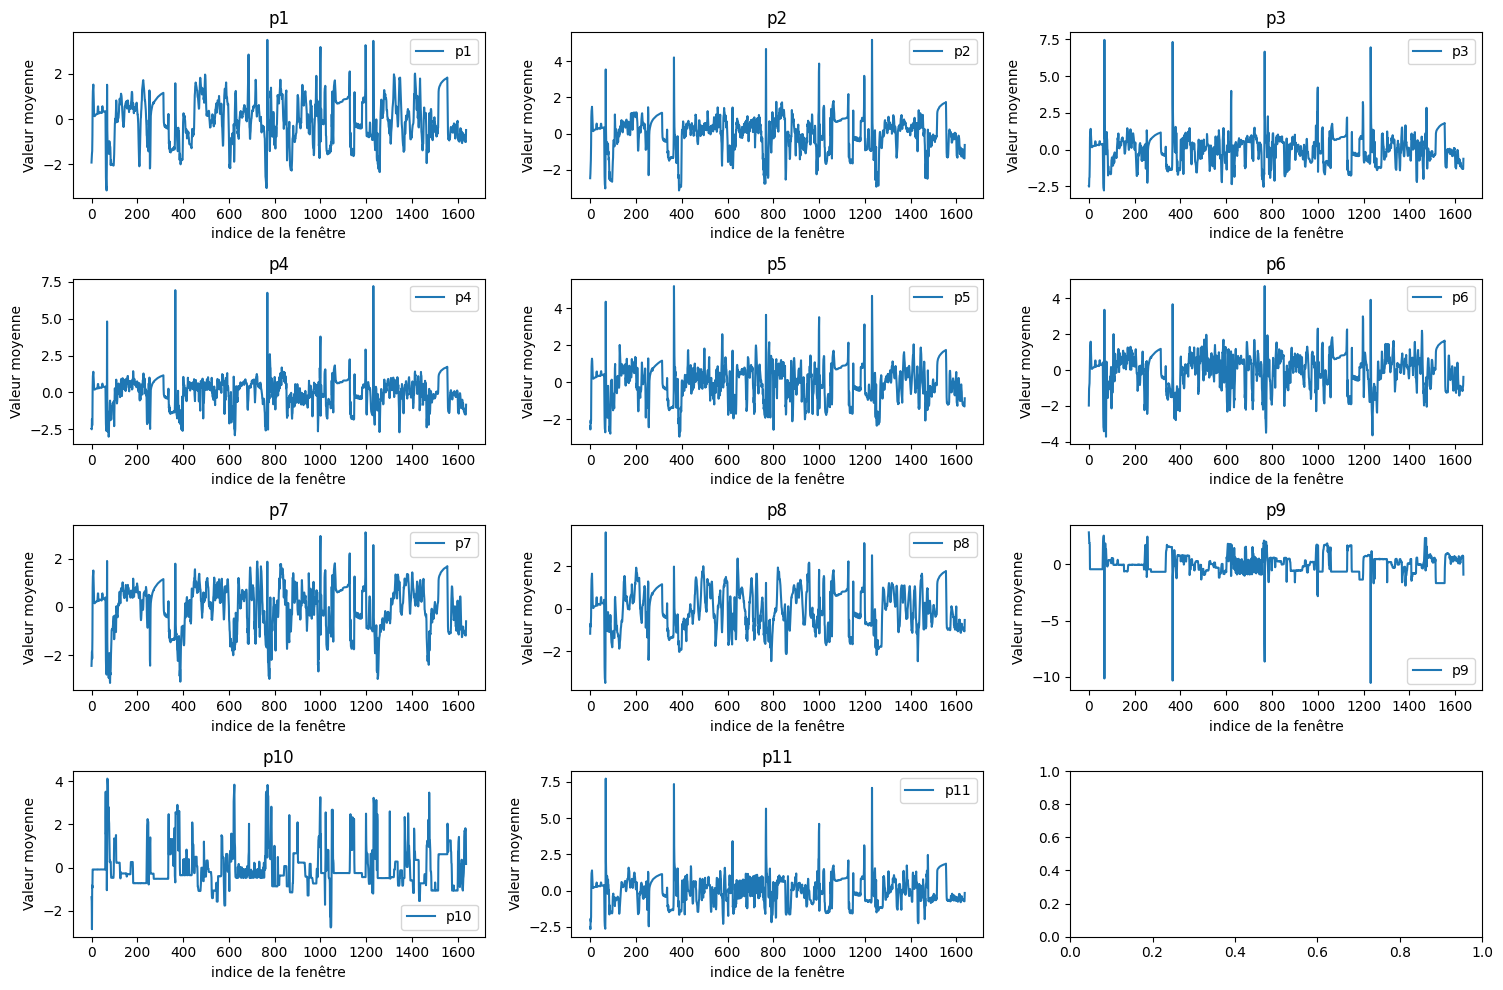

In [5]:
import numpy as np
#Nous séparons notre graphique en 12 petits graphiques et nous les traçons :

columns = [col for col in df_moyennes.columns if col != 'day_cycle_window'] # on prend uniquement les valeurs numériques p1,...,p11

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # 4 lignes, 3 colonnes

for i, col in enumerate(columns):
    # Accéder à l'axe spécifique dans la grille (i // 3 pour la ligne, i % 3 pour la colonne)
    row = i // 3
    col_index = i % 3
    
    # Tracer la variable sur le bon sous-graphe
    axes[row, col_index].plot(np.linspace(0,len(df_moyennes) - 1, num = len(df_moyennes)), df_moyennes[col], label=col)
    
    # Ajouter des titres et des labels
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel('indice de la fenêtre')
    axes[row, col_index].set_ylabel('Valeur moyenne')
    
    # Ajouter la légende
    axes[row, col_index].legend()
    
# Supprimer les graphiques vides
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Ici, nous avons beaucoup moins de valeurs et nous pouvons donc plus aisement travailler sur ces nouvelles données moyennes. Nous allons définir les besoin pour choisir l'algorithme de détection d'anomalies le plus adapté à notre problème. 

Tout d'abord, nous avons 9 paramètres, il faut donc prendre en compte le fait que notre modèle doit être multi-dimensionnel. De plus, les données sont temporelles, donc elles doivent montrer une certaine cohérence dans leur évolution, nous compareront les fenêtres voisines les unes aux autres pour évaluer cela. Et finalement nous avons un grand nombre de données, avec peu de valeurs anormales. Pour cela nous allons essayer 3 méthodes différentes :

# La méthode LOF (Local outlier Factor). 

In [15]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

df_lof = df_moyennes.copy()
p_columns = df_lof.columns[1:12]
X = df_lof[p_columns]

# Définition du modèle 
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01) #On fait l'hypothèse qui'il y a 1% d'outliers 
# dans ce jeu de données

lof_pred = lof.fit_predict(X)  # 1 pour normal, -1 pour anormal

#affichage du résultat et intégration de la colonne de normalité
print(f"Nombre d'outliers détectés par LOF: {(lof_pred == -1).sum()}")
df_lof['normal_LOF'] = lof_pred == 1
print(df_lof.head())

Nombre d'outliers détectés par LOF: 17
  day_cycle_window        p1        p2        p3        p4        p5  \
0            1_1_1 -1.926141 -2.456284 -2.487394 -2.481230 -2.388674   
1            1_1_2 -1.714067 -2.217161 -2.530537 -2.515985 -2.544961   
2            1_1_3 -1.534357 -1.779994 -1.938747 -1.835152 -2.053982   
3            1_1_4 -1.415197 -1.453962 -1.888438 -2.249327 -2.206560   
4            1_1_5 -0.732715 -0.634379 -0.963247 -1.871178 -2.048933   

         p6        p7        p8        p9       p10       p11  normal_LOF  
0 -1.984092 -2.447148 -1.169837  2.848242 -1.370045 -2.500060        True  
1 -1.040076 -2.127244 -0.700150  2.246956 -1.545889 -2.654753        True  
2 -0.866705 -1.859002 -0.837695  1.903785 -2.853705 -1.926807        True  
3 -0.732366 -2.144090 -0.687389  1.915830 -0.828060 -2.117340        True  
4 -0.004074 -1.263891 -0.316854  1.779600 -0.932193 -1.796746        True  


Nous allons tracer la PCA de nos résultats pour visualiser la position des outliers et confirmer la pertinence du modèle.

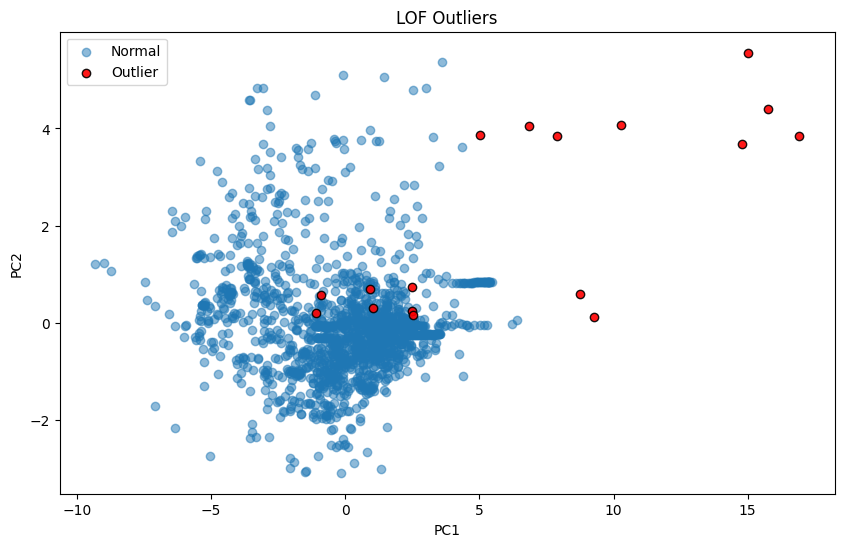

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))  # 'ax' est l'objet pour un seul graphique

# Scatter plot des points
ax.scatter(X_2d[df_lof['normal_LOF'] == True, 0],
           X_2d[df_lof['normal_LOF'] == True, 1],
           label='Normal', alpha=0.5)

ax.scatter(X_2d[df_lof['normal_LOF'] == False, 0],
           X_2d[df_lof['normal_LOF'] == False, 1],
           label='Outlier', color='red', alpha=0.9, edgecolor='black')

# Titres, légendes et axes
ax.set_title('LOF Outliers')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()

# Afficher le graphique
plt.show()

Ici, le modèle est plutôt bon, il prédit juste quelques points en outliers alors qu'ils parraissent normaux.

Verifions en tracant les paramètres uns à uns.

/tmp/ipykernel_13003/2427176124.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


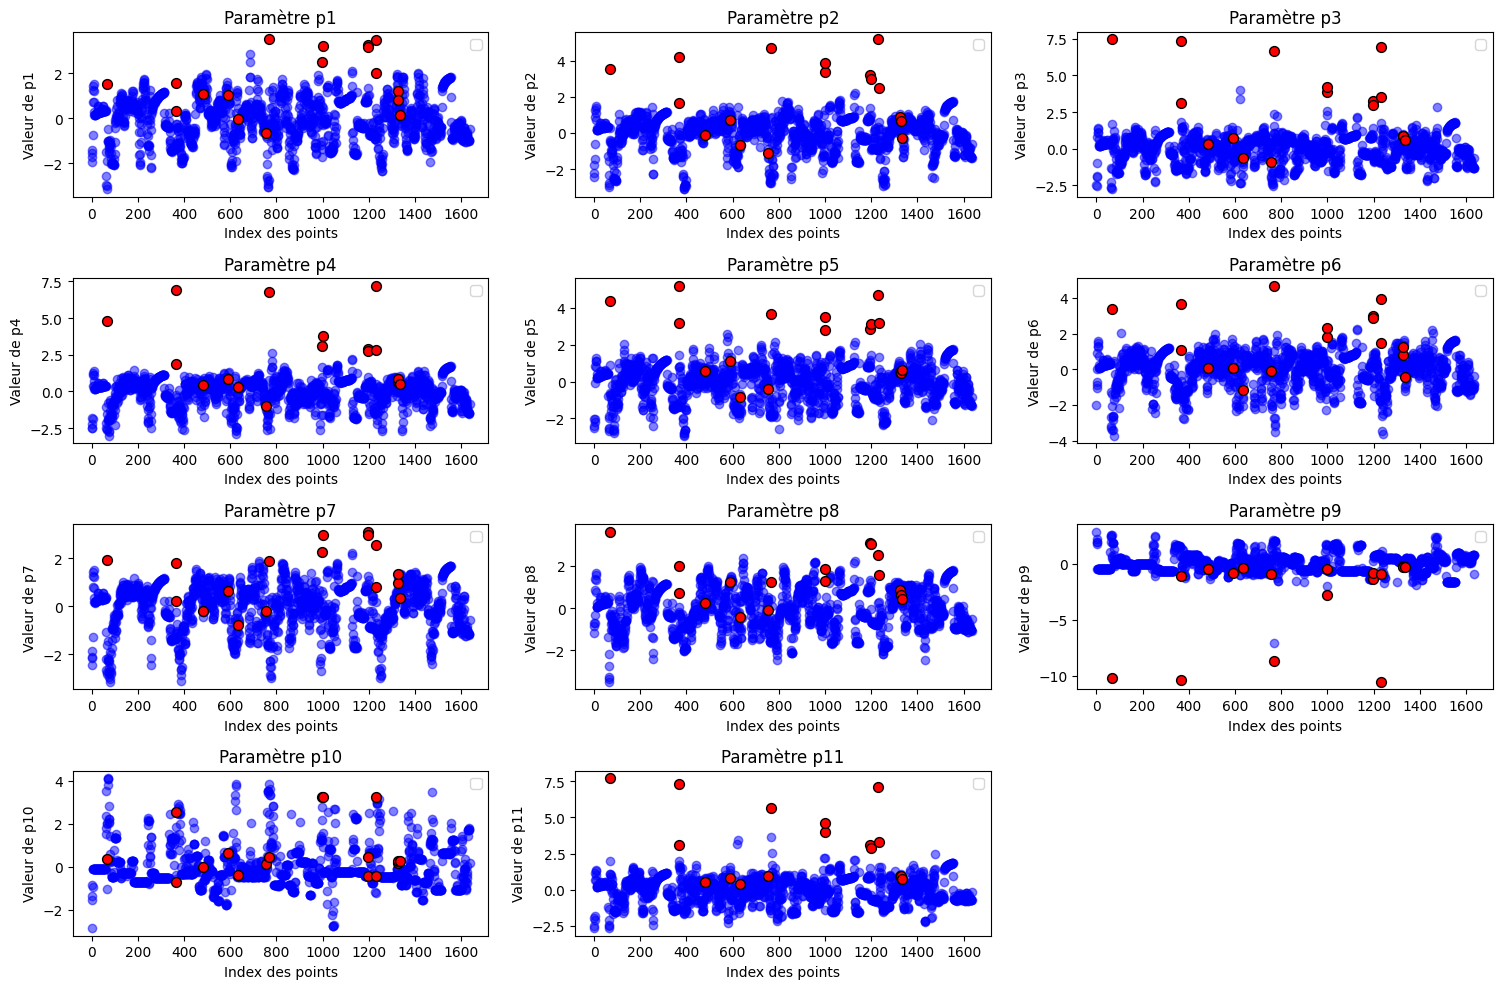

In [17]:
# Création d'une figure avec un sous-graphique pour chaque paramètre
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Ajustez en fonction de vos 11 paramètres
axes = axes.flatten()  # Aplatir pour un accès plus simple aux axes

# Boucle pour tracer chaque paramètre
for i, param in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']):
    # Scatter plot : index des points sur l'axe x, valeurs du paramètre sur y
    axes[i].scatter(range(len(df_lof)), df_lof[param], alpha=0.5, color='blue')
    axes[i].scatter(df_lof.index[df_lof['normal_LOF'] == False], 
                    df_lof.loc[df_lof['normal_LOF'] == False, param],
                    color='red', s=50, edgecolor='black')

    # Titres et légendes
    axes[i].set_title(f'Paramètre {param}')
    axes[i].set_xlabel('Index des points')
    axes[i].set_ylabel(f'Valeur de {param}')
    axes[i].legend()

# Suppression des sous-graphiques vides (si 11 graphiques dans une grille de 12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement et affichage
plt.tight_layout()
plt.show()

On voit ici que certains outliers, dans p9 par exemple, sont oubliés et considérés comme normaux. Lorsqu'on augment la contamination, le modèle relève enormément de faux outliers.

# La méthode Isolation Forest

In [18]:
df_iso_forest = df_moyennes.copy()
X = df_iso_forest[p_columns]

# Définition du modèle 
iso_forest = IsolationForest(contamination=0.01, random_state=42) # On fait l'hypothèse qui'il y a 1% 
# d'outliers dans ce jeu de données
iso_forest_pred = iso_forest.fit_predict(X)

#affichage du résultat et intégration de la colonne de normalité
print(f"Nombre de fenêtres anormales détectées par Isolation Forest: {(iso_forest_pred == -1).sum()}")
df_iso_forest['normal_iso_forest'] = iso_forest_pred == 1

Nombre de fenêtres anormales détectées par Isolation Forest: 17


Nous allons tracer la PCA et les 11 paramètres en surlignant les outliers pour visualiser leur position et confirmer la pertinence du modèle.

/tmp/ipykernel_13003/2476821390.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i+1].legend()


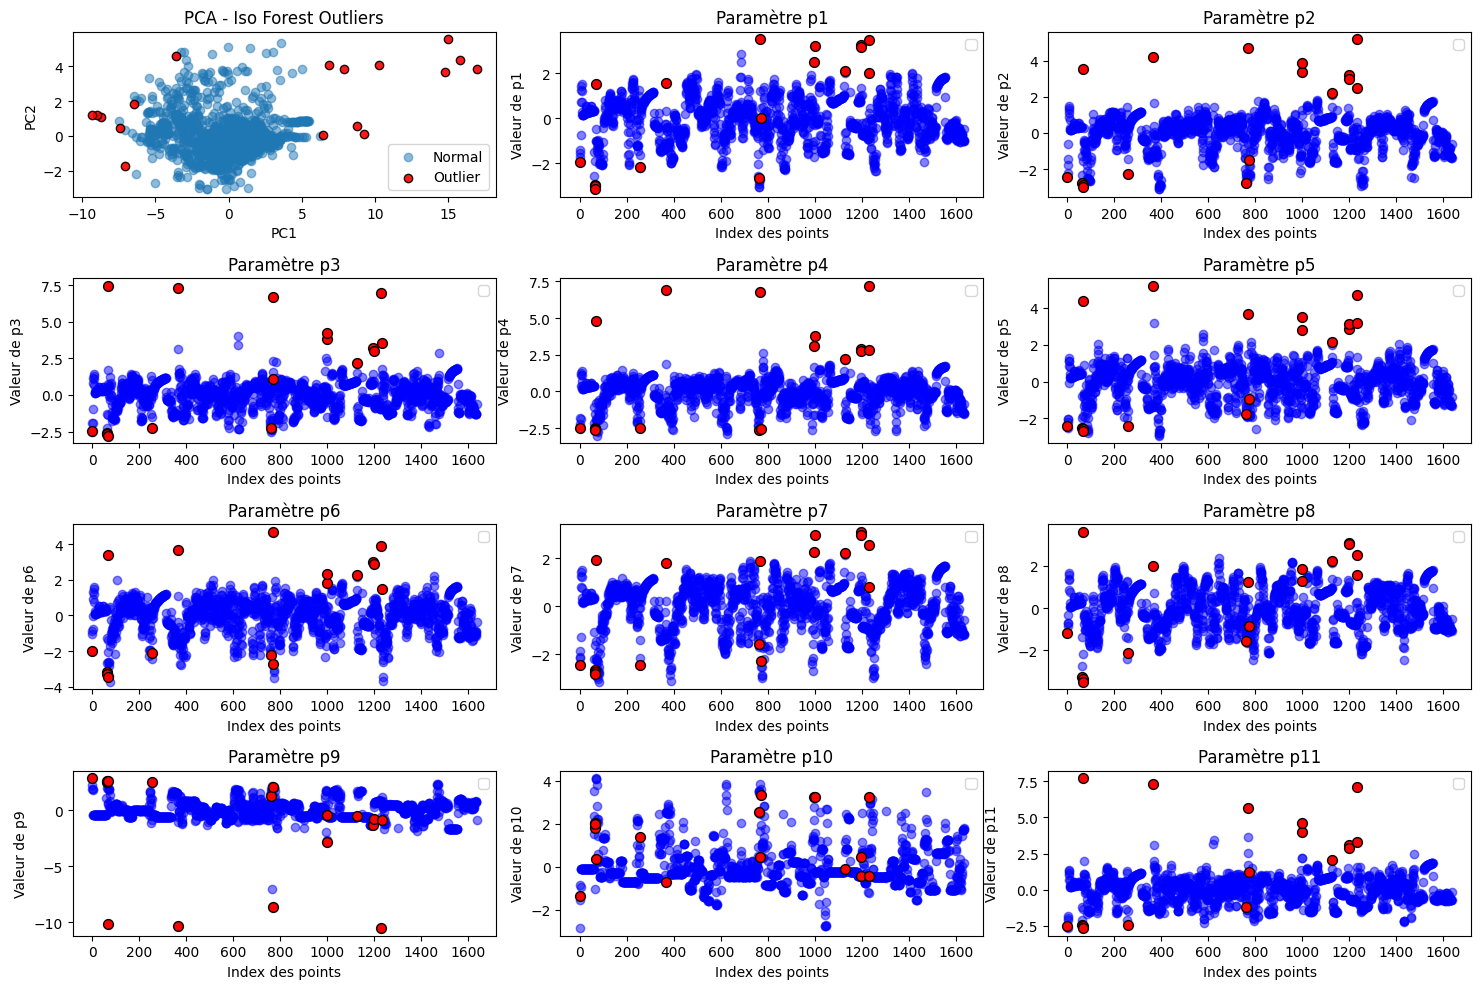

In [19]:
# Création d'une figure avec un sous-graphique pour chaque paramètre
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Ajustez en fonction de vos 11 paramètres
axes = axes.flatten()  # Aplatir pour un accès plus simple aux axes

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Scatter plot des points
axes[0].scatter(X_2d[df_iso_forest['normal_iso_forest'] == True, 0],
           X_2d[df_iso_forest['normal_iso_forest'] == True, 1],
           label='Normal', alpha=0.5)

axes[0].scatter(X_2d[df_iso_forest['normal_iso_forest'] == False, 0],
           X_2d[df_iso_forest['normal_iso_forest'] == False, 1],
           label='Outlier', color='red', alpha=0.9, edgecolor='black')

# Titres, légendes et axes
axes[0].set_title('PCA - Iso Forest Outliers')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# Boucle pour tracer chaque paramètre
for i, param in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']):
    # Scatter plot : index des points sur l'axe x, valeurs du paramètre sur y
    axes[i+1].scatter(range(len(df_iso_forest)), df_iso_forest[param], alpha=0.5, color='blue')
    axes[i+1].scatter(df_iso_forest.index[df_iso_forest['normal_iso_forest'] == False], 
                    df_iso_forest.loc[df_iso_forest['normal_iso_forest'] == False, param],
                    color='red', s=50, edgecolor='black')

    # Titres et légendes
    axes[i+1].set_title(f'Paramètre {param}')
    axes[i+1].set_xlabel('Index des points')
    axes[i+1].set_ylabel(f'Valeur de {param}')
    axes[i+1].legend()

# Ajustement et affichage
plt.tight_layout()
plt.show()

Ce modèle est bien meilleur, on peut voir que dans la PCA il ne prend aucun point dans la norme (dans le nuage de points) pour un outlier de plus, lorqu'on augment la contamination le modèle reste assez bon.

# La méthode One-class SVM 

In [20]:
df_SVM = df_moyennes.copy()
X = df_SVM[p_columns]

# Définition du modèle
svm = OneClassSVM(kernel="rbf", nu=0.01, gamma='scale')  # On fait l'hypothèse qui'il y a 1% 
# d'outliers dans ce jeu de données
svm_pred = svm.fit_predict(X)

#affichage du résultat et intégration de la colonne de normalité
print(f"Nombre de fenêtres anormales détectées par One-Class SVM: {(svm_pred == -1).sum()}")
df_SVM['normal_SVM'] = svm_pred == 1

Nombre de fenêtres anormales détectées par One-Class SVM: 43


Nous allons tracer la PCA et les 11 paramètres en surlignant les outliers pour visualiser leur position et confirmer la pertinence du modèle.


/tmp/ipykernel_13003/2938415769.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i+1].legend()


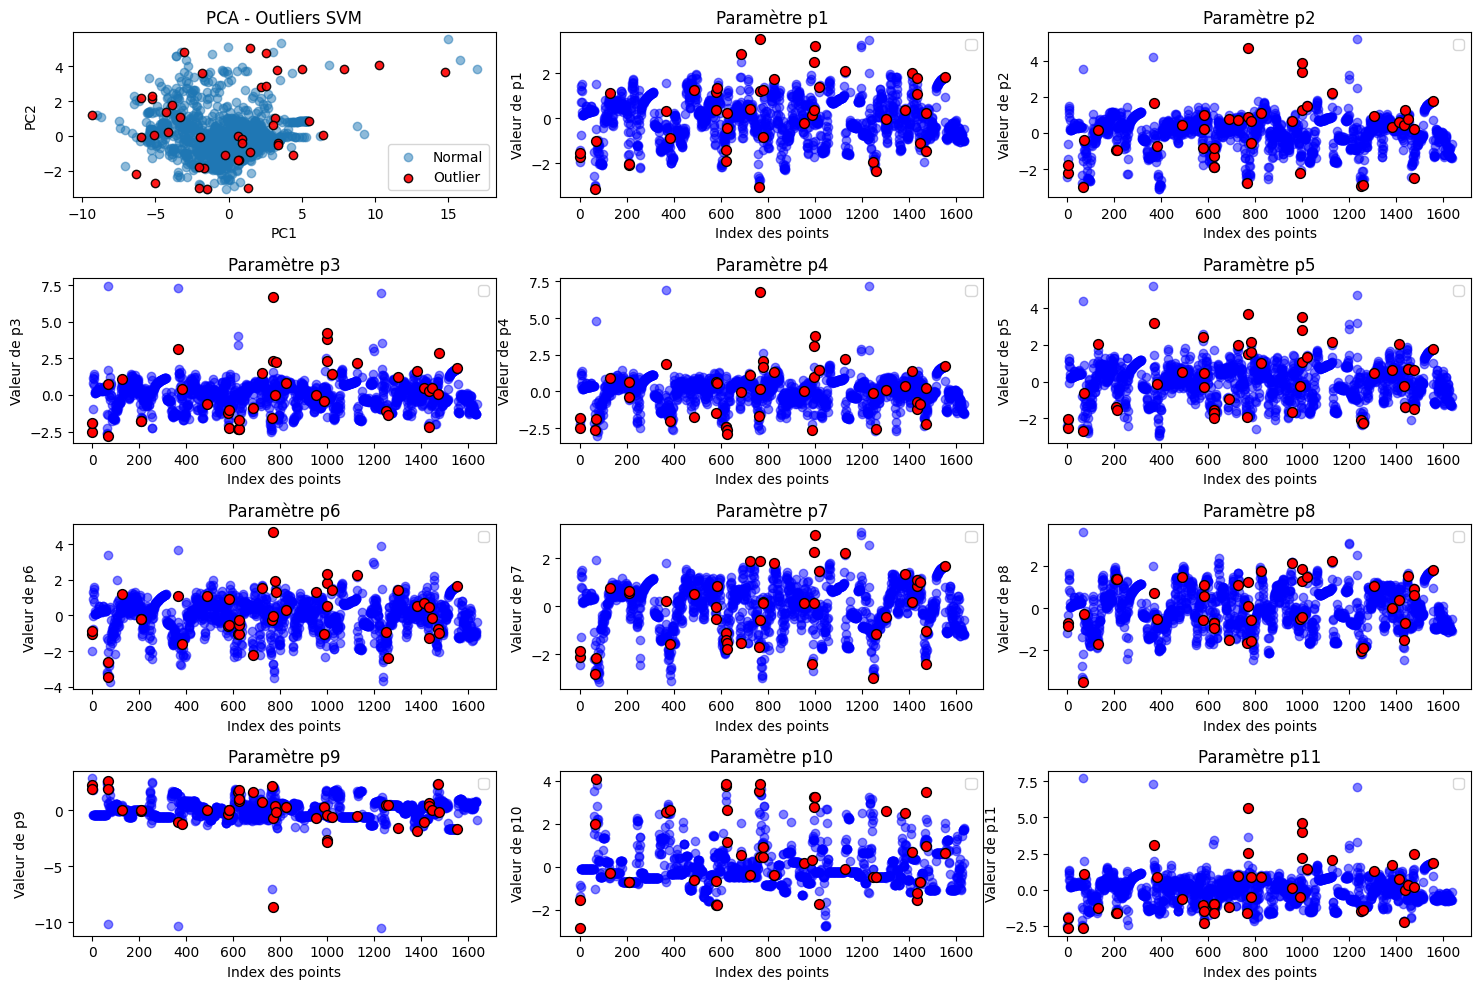

In [21]:
# Création d'une figure avec un sous-graphique pour chaque paramètre
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Ajustez en fonction de vos 11 paramètres
axes = axes.flatten()  # Aplatir pour un accès plus simple aux axes

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Scatter plot des points
axes[0].scatter(X_2d[df_SVM['normal_SVM'] == True, 0],
           X_2d[df_SVM['normal_SVM'] == True, 1],
           label='Normal', alpha=0.5)

axes[0].scatter(X_2d[df_SVM['normal_SVM'] == False, 0],
           X_2d[df_SVM['normal_SVM'] == False, 1],
           label='Outlier', color='red', alpha=0.9, edgecolor='black')

# Titres, légendes et axes
axes[0].set_title('PCA - Outliers SVM')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# Boucle pour tracer chaque paramètre
for i, param in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']):
    # Scatter plot : index des points sur l'axe x, valeurs du paramètre sur y
    axes[i+1].scatter(range(len(df_SVM)), df_SVM[param], alpha=0.5, color='blue')
    axes[i+1].scatter(df_SVM.index[df_SVM['normal_SVM'] == False], 
                    df_SVM.loc[df_SVM['normal_SVM'] == False, param],
                    color='red', s=50, edgecolor='black')

    # Titres et légendes
    axes[i+1].set_title(f'Paramètre {param}')
    axes[i+1].set_xlabel('Index des points')
    axes[i+1].set_ylabel(f'Valeur de {param}')
    axes[i+1].legend()

# Ajustement et affichage
plt.tight_layout()
plt.show()

Ce modèle n'est pas adapté au problème. Il ne détecte pas certains outliers et prend des fenêtres normales pour des outliers.

# Conclusion

Dans ces 3 modèles, le modèle le plus adapté est le Isolation Forest, nous allons désormais essayer de l'optimiser. 

# Optimisation des paramètres du modèle Isolation Forest


En modifiant le nombre d'arbres dans le modèle Isolation forest ci-dessus, nous observons qu'au dela de 250 arbres le modèle ne s'améliore plus, et décidons donc de fixer le nombre d'arbres à 250. En dessous de 250, certains outliers sont oubliés ou alors certaines données normales sont considérées outliers.

Ensuite en modifiant le facteur de contamination, nous observons que les outliers sont tous detectés par le modèle lorsqu'elle atteint 3%. Au dessus de 3%, trop de données normales sont considérées outliers et en dessous de 3% il y a beaucoup d'outliers qui sont oubliés. 

Je fixe donc le nombre d'arbres à 250 et la contamination à 3%.



Nombre total d'outliers détectés : 50
Outliers détectés :
['1_1_1', '1_1_2', '1_1_3', '1_1_64', '1_1_65', '1_1_66', '1_1_67', '1_2_1', '1_2_3', '1_2_4', '1_2_5', '1_2_6', '1_2_8', '1_4_1', '1_4_2', '2_1_1', '2_1_2', '2_1_23', '2_1_24', '2_1_25', '2_2_75', '2_2_76', '2_3_1', '2_3_2', '2_3_139', '2_3_140', '2_3_141', '2_3_142', '2_3_143', '3_1_1', '3_1_2', '3_1_4', '3_1_5', '3_1_6', '3_1_7', '3_1_8', '3_2_49', '3_2_51', '3_2_52', '3_3_63', '3_3_127', '3_3_128', '4_1_16', '4_1_17', '4_2_1', '4_2_2', '4_2_28', '4_2_29', '4_4_77', '4_4_78']


/tmp/ipykernel_13003/2341674217.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i+1].legend()


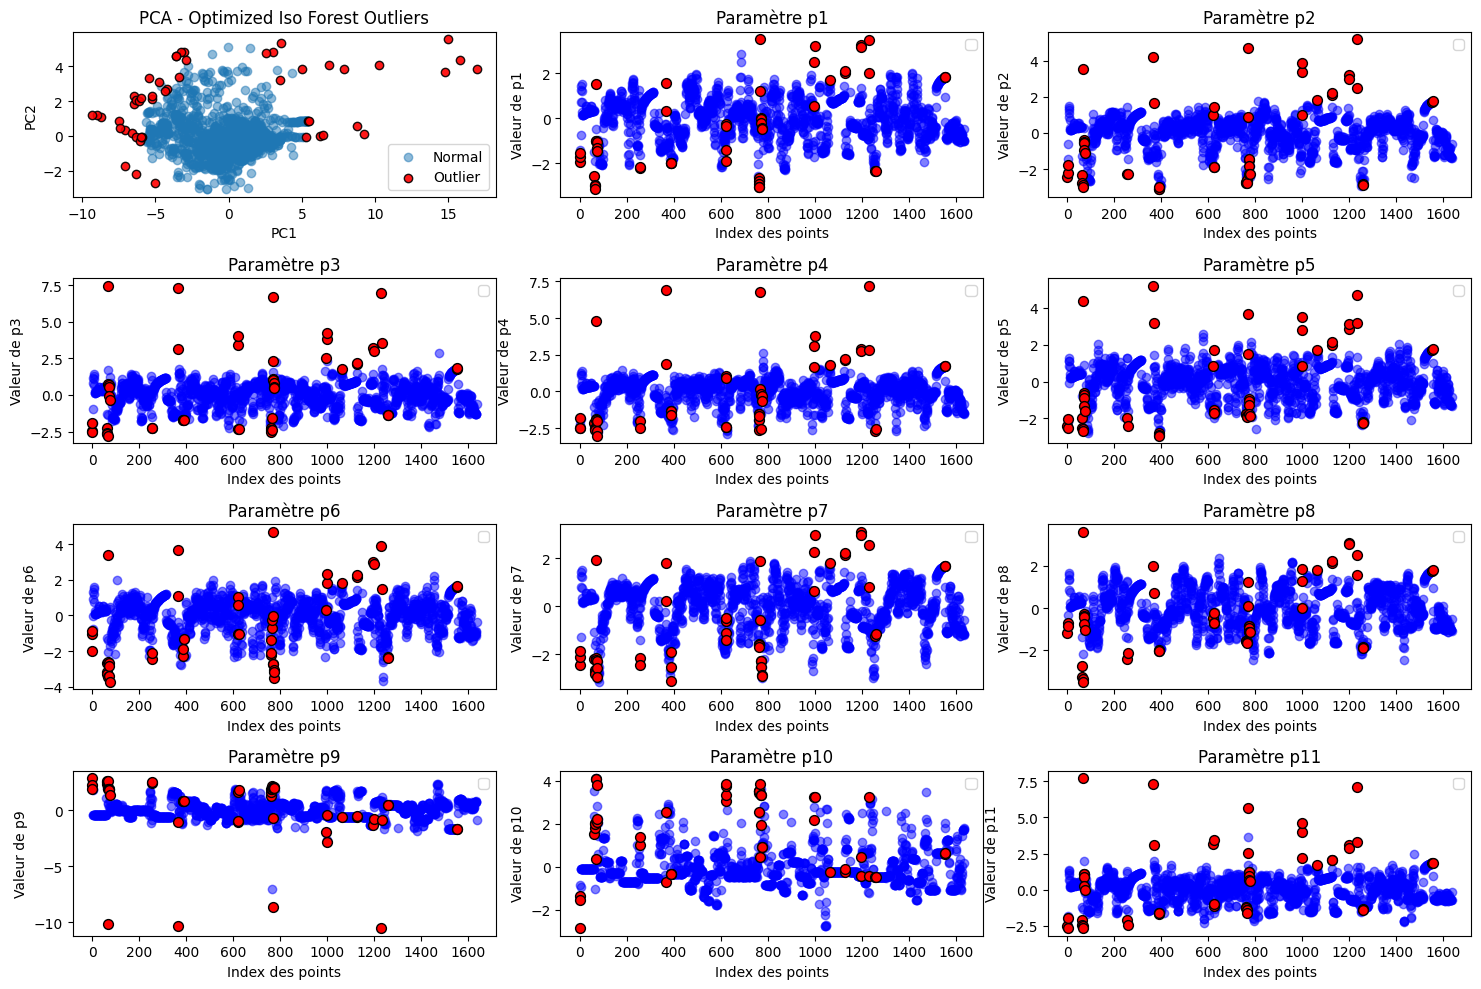

In [22]:
df_outlier = df_moyennes.copy()
X = df_outlier[p_columns]

# Définition du modèle 
outlier = IsolationForest(contamination=0.03, random_state=250) 
outlier_pred = outlier.fit_predict(X)

#affichage du résultat et intégration de la colonne de normalité
df_outlier['fenêtre_normale'] = outlier_pred == 1
print(f"Nombre total d'outliers détectés : {(outlier_pred == -1).sum()}")
outliers = df_outlier[df_outlier['fenêtre_normale'] != True]

# Quelles fenêtres sont anormales
list_outliers = []
print("Outliers détectés :")
for index, row in outliers.iterrows():
    list_outliers.append(row['day_cycle_window'])
print(list_outliers)

# Création d'une figure avec un sous-graphique pour chaque paramètre
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Ajustez en fonction de vos 11 paramètres
axes = axes.flatten()  # Aplatir pour un accès plus simple aux axes

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Scatter plot des points
axes[0].scatter(X_2d[df_outlier['fenêtre_normale'] == True, 0],
           X_2d[df_outlier['fenêtre_normale'] == True, 1],
           label='Normal', alpha=0.5)

axes[0].scatter(X_2d[df_outlier['fenêtre_normale'] == False, 0],
           X_2d[df_outlier['fenêtre_normale'] == False, 1],
           label='Outlier', color='red', alpha=0.9, edgecolor='black')

# Titres, légendes et axes
axes[0].set_title('PCA - Optimized Iso Forest Outliers')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()

# Boucle pour tracer chaque paramètre
for i, param in enumerate(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']):
    # Scatter plot : index des points sur l'axe x, valeurs du paramètre sur y
    axes[i+1].scatter(range(len(df_outlier)), df_outlier[param], alpha=0.5, color='blue')
    axes[i+1].scatter(df_outlier.index[df_outlier['fenêtre_normale'] == False], 
                    df_outlier.loc[df_outlier['fenêtre_normale'] == False, param],
                    color='red', s=50, edgecolor='black')

    # Titres et légendes
    axes[i+1].set_title(f'Paramètre {param}')
    axes[i+1].set_xlabel('Index des points')
    axes[i+1].set_ylabel(f'Valeur de {param}')
    axes[i+1].legend()

# Ajustement et affichage
plt.tight_layout()
plt.show()

Pour mieux visualiser l'impact des différents paramètres sur ces outliers et verifier que le modèle est cohérent, nous allons calculer l'implication de chaque paramètre dans chaque outlier. Ne doit-on pas plutôt appliquer un algorithme de détection d'anomalies sur chaques paramètres indépendemment ? 

Nombre total d'outliers détectés : 50
Fenêtre 1_1_1 est anormale à cause de ['p3', 'p4', 'p5', 'p7', 'p9', 'p11']
Fenêtre 1_1_2 est anormale à cause de ['p2', 'p3', 'p4', 'p5', 'p9', 'p11']
Fenêtre 1_1_3 est anormale à cause de ['p3', 'p9', 'p10', 'p11']
Fenêtre 1_1_64 est anormale à cause de ['p1', 'p2', 'p3', 'p6', 'p8', 'p9', 'p11']
Fenêtre 1_1_65 est anormale à cause de ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p11']
Fenêtre 1_1_66 est anormale à cause de ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p11']
Fenêtre 1_1_67 est anormale à cause de ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p11']
Fenêtre 1_2_1 est anormale à cause de ['p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p11']
Fenêtre 1_2_3 est anormale à cause de ['p6', 'p9', 'p10']
Fenêtre 1_2_4 est anormale à cause de ['p6', 'p9', 'p10']
Fenêtre 1_2_5 est anormale à cause de ['p6', 'p9', 'p10']
Fenêtre 1_2_6 est anormale à cause de ['p4', 'p6', 'p7']
Fenêtre 1_2_8 est anormale à cause

/tmp/ipykernel_13003/2824543682.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


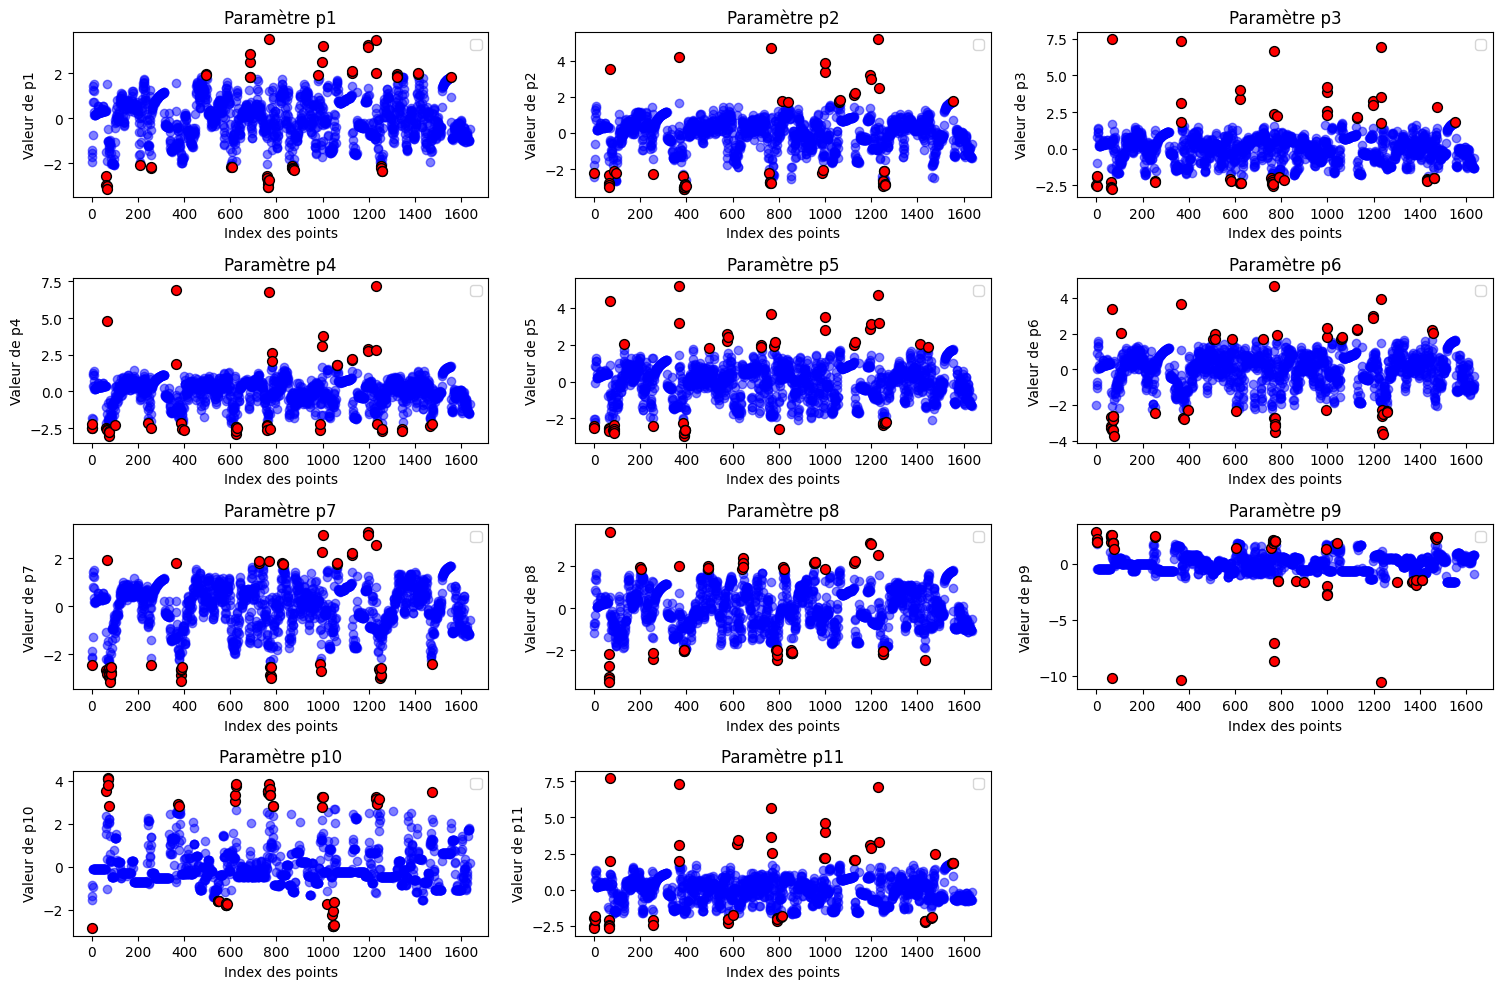

In [23]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Copie du DataFrame
df_outlier = df_moyennes.copy()

# Sélection des colonnes de paramètres
p_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11']
X = df_outlier[p_columns]

# Création d'un modèle Isolation Forest global
outlier = IsolationForest(contamination=0.03, random_state=250)
outlier_pred = outlier.fit_predict(X)

# Intégration de la colonne de normalité globale
df_outlier['fenêtre_normale'] = outlier_pred == 1
print(f"Nombre total d'outliers détectés : {(outlier_pred == -1).sum()}")

# ---- Détection d'anomalies paramètre par paramètre ----
param_outliers = pd.DataFrame(index=df_outlier.index)

# Boucle sur chaque paramètre
for param in p_columns:
    model = IsolationForest(contamination=0.03, random_state=250)
    param_outliers[param] = model.fit_predict(df_outlier[[param]]) == -1  # -1 = outlier

# Ajout d'une colonne qui indique si un paramètre est un outlier
df_outlier['param_outlier'] = param_outliers.any(axis=1)

# Affichage des paramètres responsables des anomalies
for idx, row in df_outlier.iterrows():
    if not row['fenêtre_normale']:  # Si la fenêtre est anormale
        outlier_params = [p for p in p_columns if param_outliers.loc[idx, p]]
        print(f"Fenêtre {row['day_cycle_window']} est anormale à cause de {outlier_params}")

# ---- Visualisation des paramètres avec outliers ----
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Grille 4x3 pour 11 paramètres
axes = axes.flatten()

# Boucle pour tracer chaque paramètre individuellement
for i, param in enumerate(p_columns):
    # Scatter plot des valeurs normales
    axes[i].scatter(range(len(df_outlier)), df_outlier[param], alpha=0.5, color='blue')

    # Scatter des outliers pour ce paramètre
    outlier_idx = param_outliers[param]
    axes[i].scatter(df_outlier.index[outlier_idx],
                    df_outlier.loc[outlier_idx, param],
                    color='red', edgecolor='black', s=50)

    # Titres et légendes
    axes[i].set_title(f"Paramètre {param}")
    axes[i].set_xlabel("Index des points")
    axes[i].set_ylabel(f"Valeur de {param}")
    axes[i].legend()

# Ajustement et suppression des graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

On voit que chaque outlier est un outlier pour plusieurs paramètres, le choix que nous avons pris d'appliquer l'algorithme de détection à la base de donnée multi dimensionnelle est donc justifié et les résultats sont verifiés ici visuellement car les outliers semblent tout a fait cohérent avec l'allure des données pour chaque paramètre. Cette visualisation nous a permis de confirmer le nombre d'arbres à 250 et la contamination à 3% car la détection paraît assez juste.

Pour améliorer le modèle nous voyons qu'il est possible de modifier la contamination pour les différents paramètres car les distributions ne sont pas les mêmes, bien qu'elles soient du même ordre de grandeur. Cependant les résultats sont actuellement satisfaisants et je pense que adapter le modèle à chaque paramètre serait très répétitif pour peu d'amélioration.
 